In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
import pandas as pd

# Load dataset
file_path = "D:/dm_assignment/datasets/noisy_dataset.csv"
df = pd.read_csv(file_path)

print("Original Dataset:")
print(df)

Original Dataset:
   ID  Age   Salary
0   1   25    50000
1   2   26    52000
2   3   27    51000
3   4   26    50500
4   5  200    51500
5   6   28    49000
6   7   29    49500
7   8   28  1000000
8   9   30    51000
9  10   27      abc


In [3]:
# Convert Age and Salary to numeric, invalid values -> NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Detect missing / invalid entries
print("\nNoise (Missing or Non-Numeric Values):")
print(df[df.isnull().any(axis=1)])


Noise (Missing or Non-Numeric Values):
   ID  Age  Salary
9  10   27     NaN


In [4]:
# Z-score method for outlier detection
from scipy.stats import zscore

# Drop NaN for calculation
df_clean = df.dropna()

# Compute z-scores
z_scores = df_clean[['Age', 'Salary']].apply(zscore)

# Mark rows where z-score > 3 as outliers
outliers = df_clean[(abs(z_scores) > 3).any(axis=1)]

print("\nOutliers Detected (Z-score > 3):")
print(outliers)


Outliers Detected (Z-score > 3):
Empty DataFrame
Columns: [ID, Age, Salary]
Index: []


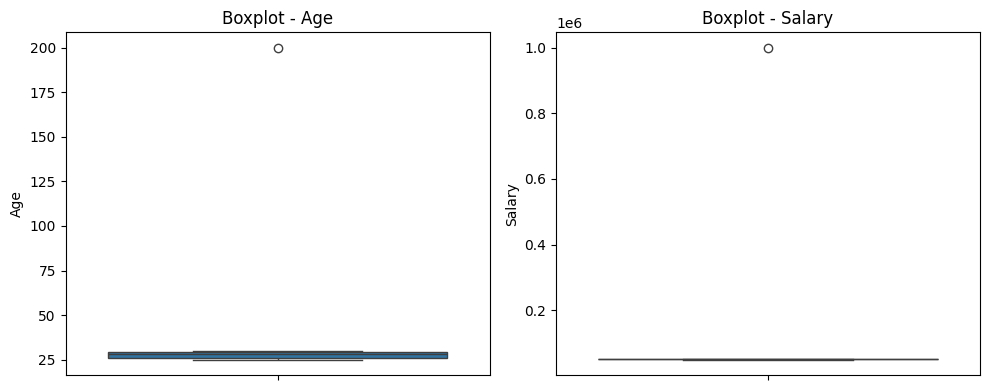

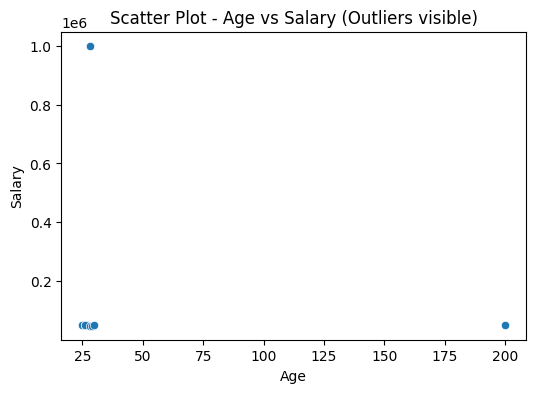

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Salary to numeric (invalid -> NaN)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Drop NaN for plotting
df_plot = df.dropna()

# Boxplots
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(y=df_plot['Age'])
plt.title("Boxplot - Age")

plt.subplot(1,2,2)
sns.boxplot(y=df_plot['Salary'])
plt.title("Boxplot - Salary")

plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Salary', data=df_plot)
plt.title("Scatter Plot - Age vs Salary (Outliers visible)")
plt.show()